In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from one_stage.new_dataset import SpectrogramDataset
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset

In [2]:
data_dir = "/home/dev/dataset/onc/preprocessed/validation"
preprocessing_method = "mel"
spectrogram_dataset = SpectrogramDataset(
    data_dir, preprocessing_method=preprocessing_method, excluded_classes=["other"]
)

In [3]:
print("Number of samples:", len(spectrogram_dataset))

Number of samples: 13184


In [4]:
spectrogram_dataset.classes

['background', 'tug', 'passengership', 'tanker', 'cargo']

In [5]:
data = spectrogram_dataset.data

classes = []

for x, y in data:
    classes.append(y)

set(classes)

{0, 1, 2, 3, 4}

In [6]:
sample_idx = 0
spectrogram, label = spectrogram_dataset[sample_idx]
print("Spectrogram shape:", spectrogram.shape)
print("Label:", label)

Spectrogram shape: (95, 126)
Label: 0


In [7]:
spectrogram_dataset.data

[(array([[4.0059505e-05, 5.6323312e-05, 8.4150321e-05, ..., 6.0220103e-05,
          4.1126768e-05, 3.4655775e-05],
         [3.5874364e-05, 4.9663475e-05, 1.1250030e-04, ..., 8.7923487e-05,
          5.7856843e-05, 4.0748440e-05],
         [2.6699854e-04, 3.0550847e-04, 3.6522112e-04, ..., 1.9021404e-04,
          9.9550947e-05, 5.9407419e-05],
         ...,
         [2.3631639e-05, 2.9381185e-05, 3.6662568e-05, ..., 1.3831874e-05,
          9.3966501e-06, 8.8586521e-06],
         [1.9351139e-05, 2.2145070e-05, 2.5583267e-05, ..., 1.1945527e-05,
          4.5361530e-06, 3.2682171e-06],
         [3.2477601e-06, 3.7604575e-06, 4.9457840e-06, ..., 1.1832928e-05,
          6.0393436e-06, 3.8787275e-06]], dtype=float32),
  0),
 (array([[2.05786302e-04, 1.45703481e-04, 3.92606235e-05, ...,
          1.45899074e-04, 1.05758896e-04, 6.54353862e-05],
         [3.52559466e-04, 2.77087151e-04, 1.51191183e-04, ...,
          5.12572151e-05, 2.87659459e-05, 1.71725605e-05],
         [3.19565530e-0

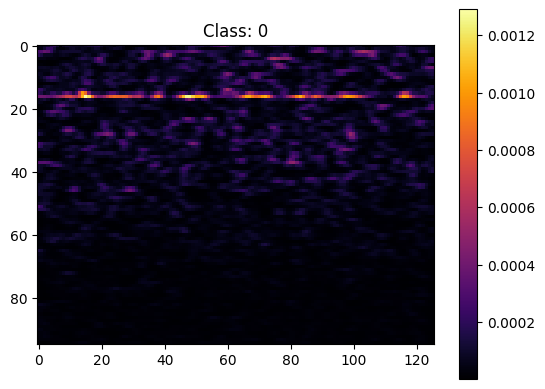

In [8]:
plt.imshow(spectrogram, cmap="inferno")
plt.title(f"Class: {label}")
plt.colorbar()
plt.show()

In [9]:
batch_size = 25
dataloader = DataLoader(spectrogram_dataset, batch_size=batch_size, shuffle=True)
device = "cuda"

for batch_idx, (batch_spectrograms, batch_labels) in enumerate(dataloader):
    print("Batch Index:", batch_idx)
    print("Batch Spectrograms shape:", batch_spectrograms.shape)
    print("Batch Labels:", batch_labels)
    batch_spectrograms = batch_spectrograms.to(device)
    batch_labels = batch_labels.to(device)
    print("Batch Spectrograms device:", batch_spectrograms.device)
    print("Batch Labels device:", batch_labels.device)

    # print("Batch spectrograms", batch_spectrograms)
    print(batch_spectrograms.unsqueeze(1).float().shape)

    break  # Just printing the first batch for brevity

Batch Index: 0
Batch Spectrograms shape: torch.Size([25, 95, 126])
Batch Labels: tensor([2, 4, 0, 4, 1, 1, 1, 2, 0, 1, 4, 0, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0,
        1])
Batch Spectrograms device: cuda:0
Batch Labels device: cuda:0
torch.Size([25, 1, 95, 126])


In [10]:
dataloader.dataset.classes

['background', 'tug', 'passengership', 'tanker', 'cargo']

In [11]:
dataloader.dataset.class_to_idx

{'background': 0, 'tug': 1, 'passengership': 2, 'tanker': 3, 'cargo': 4}